In [1]:
!pip install kaggle


In [2]:
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset


Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
usa-real-estate-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service
import pandas as pd
import os
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [4]:
df = pd.read_csv('realtor-data.zip.csv')

In [5]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [7]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [8]:
len(df)

df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [9]:
df.drop(columns=['prev_sold_date'], inplace=True)

In [10]:
df_cleaned = df.dropna()

In [11]:
len(df_cleaned)

1354105

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1354105 entries, 0 to 2226381
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   brokered_by  1354105 non-null  float64
 1   status       1354105 non-null  object 
 2   price        1354105 non-null  float64
 3   bed          1354105 non-null  float64
 4   bath         1354105 non-null  float64
 5   acre_lot     1354105 non-null  float64
 6   street       1354105 non-null  float64
 7   city         1354105 non-null  object 
 8   state        1354105 non-null  object 
 9   zip_code     1354105 non-null  float64
 10  house_size   1354105 non-null  float64
dtypes: float64(8), object(3)
memory usage: 124.0+ MB


In [13]:
df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],bins = [0, 500000, 1000000, 2000000, 5000000, np.inf], 
                                 labels = ['Affordable', 'Mid-range', 'High-end', 'Luxury', 'Ultra-Luxury']
)


city_area = ['New York', 'Los Angeles','Chicago']
pattern = '|'.join(city_area)
df_city = df_cleaned.loc[df_cleaned.city.str.contains(pattern)]
df_city.reset_index(drop=True, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8348\1253966610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],bins = [0, 500000, 1000000, 2000000, 5000000, np.inf],


In [14]:
df_city = df_city[['city','state','house_size','bed','bath','price','PriceSegment']]
df_city

,city,state,house_size,bed,bath,price,PriceSegment
0,New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
1,New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
2,New York City,New York,700.0,1.0,1.0,945000.0,Mid-range
3,New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
4,New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury
...,...,...,...,...,...,...,...
14477,Los Angeles,California,1456.0,3.0,2.0,749999.0,Mid-range
14478,Los Angeles,California,3346.0,3.0,4.0,1899000.0,High-end
14479,Lake Los Angeles,California,1770.0,4.0,2.0,399000.0,Affordable
14480,Lake Los Angeles,California,1320.0,3.0,2.0,369990.0,Affordable


In [15]:
con = sqlite3.connect('AmericaHouse.db')
cur = con.cursor()

In [16]:
%load_ext sql 

In [17]:
%sql sqlite:///AmericaHouse.db

In [18]:
df_city.to_sql('CityArea',con,if_exists = 'replace',index = False)

14482

In [19]:
%%sql 
SELECT *
FROM CityArea
WHERE [price] >= 1000000

 * sqlite:///AmericaHouse.db
Done.


city,state,house_size,bed,bath,price,PriceSegment
New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury
New York City,New York,2775.0,8.0,4.0,1599000.0,High-end
New York City,New York,1143.0,2.0,2.0,2545000.0,Luxury
New York City,New York,3007.0,3.0,3.0,4100000.0,Luxury
New York City,New York,1162.0,3.0,2.0,1695000.0,High-end
New York City,New York,3650.0,4.0,4.0,12995000.0,Ultra-Luxury
New York City,New York,2661.0,3.0,3.0,6250000.0,Ultra-Luxury


In [20]:
con.close()

# Phân tích giá nhà tại các khu vực thành phố lớn

In [21]:
stats = df_city.describe()
print("Thống kê mô tả tổng quát cho giá bất động sản")
stats

Thống kê mô tả tổng quát cho giá bất động sản


,house_size,bed,bath,price
count,14482.000000,14482.000000,14482.000000,1.448200e+04
mean,2292.820191,3.777172,3.036528,1.498986e+06
std,2259.080243,3.011475,2.860590,3.543339e+06
min,394.000000,1.000000,1.000000,7.000000e+03
25%,1190.000000,2.000000,2.000000,3.999000e+05
50%,1693.000000,3.000000,2.000000,7.990000e+05
75%,2677.000000,4.000000,3.000000,1.540000e+06
max,59071.000000,70.000000,74.000000,1.690000e+08


In [22]:
# Độ biến thiên giá theo khu vực
price_variance_by_location = df_city.groupby('state')['price'].var()

price_variance_by_location

state
California    1.316039e+13
Illinois      3.894917e+11
Indiana       2.702291e+09
Minnesota     4.745614e+10
New Jersey    1.057247e+09
New York      4.259234e+13
Name: price, dtype: float64

In [23]:
# Số lượng bất động sản theo khu vực

count_by_city = df['city'].value_counts()
count_by_city

city
Houston                        23862
Chicago                        18238
New York City                  12634
Jacksonville                   11743
Philadelphia                   10449
                               ...  
Angel Ifre                         1
Colfax County Moreno Valley        1
Little Sioux                       1
Trementina                         1
Kahlotus                           1
Name: count, Length: 20098, dtype: int64

In [24]:
# Hệ số biến thiên giá (coeefficient of variation) 
cv = df_city['price'].std() / df_city['price'].mean()
cv

2.363824599628754

In [45]:
# Độ phân tán giá
price_range = df_city['price'].max() - df_city['price'].min()

price_range

168993000.0

In [46]:
Q1 = df_city['price'].quantile(0.25)
Q3 = df_city['price'].quantile(0.75)

IQR = Q3 - Q1 

outliers = df_city[(df_city['price'] < (Q1 - 1.5 * IQR)) | (df_city['price'] > (Q3 + 1.5 * IQR))]

outliers

,city,state,house_size,bed,bath,price,PriceSegment
0,New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
1,New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
3,New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
4,New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury
8,New York City,New York,3007.0,3.0,3.0,4100000.0,Luxury
...,...,...,...,...,...,...,...
14446,Los Angeles,California,3135.0,3.0,3.0,3995000.0,Luxury
14449,Los Angeles,California,5366.0,5.0,6.0,5125000.0,Ultra-Luxury
14450,Los Angeles,California,3670.0,4.0,4.0,4250000.0,Luxury
14456,Los Angeles,California,4878.0,5.0,5.0,6795000.0,Ultra-Luxury


In [47]:
# Độ lệch trung bình tuyệt đối (mean absolute deviation)
price_data = df_city['price']
mean_price = price_data.mean()

mad = (price_data - mean_price).abs().mean()

mad


1276262.8674138265

In [48]:
# Tần suất xuất hiện của giá (frequency analysis)
frequency = df_city['PriceSegment'].value_counts()
frequency

PriceSegment
Affordable      4590
Mid-range       4171
High-end        3332
Luxury          1830
Ultra-Luxury     559
Name: count, dtype: int64

In [49]:
# Hệ số tương quan giữa gía và diện tích
corr_price_area = df_city['price'].corr(df_city['house_size'])
corr_price_area

0.6017457079285483

In [50]:
# Hệ số tương quan giữa giá và phòng ngủ
corr_price_bed = df_city['price'].corr(df_city['bed'])
corr_price_bed

0.2567548491651359

In [51]:
# Hệ số tương quan giữa vùng 
mean_price_by_location = df_city.groupby('state')['price'].mean()
mean_price_by_location.sort_values(ascending = False)

state
New York      3.233296e+06
California    1.853397e+06
Illinois      4.649874e+05
Minnesota     2.509429e+05
New Jersey    2.463800e+05
Indiana       1.671393e+05
Name: price, dtype: float64

In [52]:
outliers_upper = df_city[df_city['price'] > (Q3 + 1.5 * IQR)]
outliers_lower = df_city[df_city['price'] < (Q1 - 1.5 * IQR)]
print(f'Outliers upper : {outliers_upper}')
print(f'Outliers lower : {outliers_lower}')

Outliers upper :                 city       state  house_size  bed  bath      price  \
0      New York City    New York      3224.0  5.0   4.0  3500000.0   
1      New York City    New York      6100.0  8.0   8.0  7850000.0   
3      New York City    New York      1868.0  3.0   3.0  4475000.0   
4      New York City    New York      4400.0  1.0   2.0  3895000.0   
8      New York City    New York      3007.0  3.0   3.0  4100000.0   
...              ...         ...         ...  ...   ...        ...   
14446    Los Angeles  California      3135.0  3.0   3.0  3995000.0   
14449    Los Angeles  California      5366.0  5.0   6.0  5125000.0   
14450    Los Angeles  California      3670.0  4.0   4.0  4250000.0   
14456    Los Angeles  California      4878.0  5.0   5.0  6795000.0   
14462    Los Angeles  California      2848.0  3.0   3.0  3795000.0   

       PriceSegment  
0            Luxury  
1      Ultra-Luxury  
3            Luxury  
4            Luxury  
8            Luxury  
...       

In [53]:
price_quantiles = df_city['price'].quantile([0.25,0.5,0.7,1.0])
price_quantiles

0.25       399900.0
0.50       799000.0
0.70      1345000.0
1.00    169000000.0
Name: price, dtype: float64

# Data Visualization

In [54]:
df_city.head()

,city,state,house_size,bed,bath,price,PriceSegment
0,New York City,New York,3224.0,5.0,4.0,3500000.0,Luxury
1,New York City,New York,6100.0,8.0,8.0,7850000.0,Ultra-Luxury
2,New York City,New York,700.0,1.0,1.0,945000.0,Mid-range
3,New York City,New York,1868.0,3.0,3.0,4475000.0,Luxury
4,New York City,New York,4400.0,1.0,2.0,3895000.0,Luxury


Text(0, 0.5, 'Giá BĐS trung bình (USD')

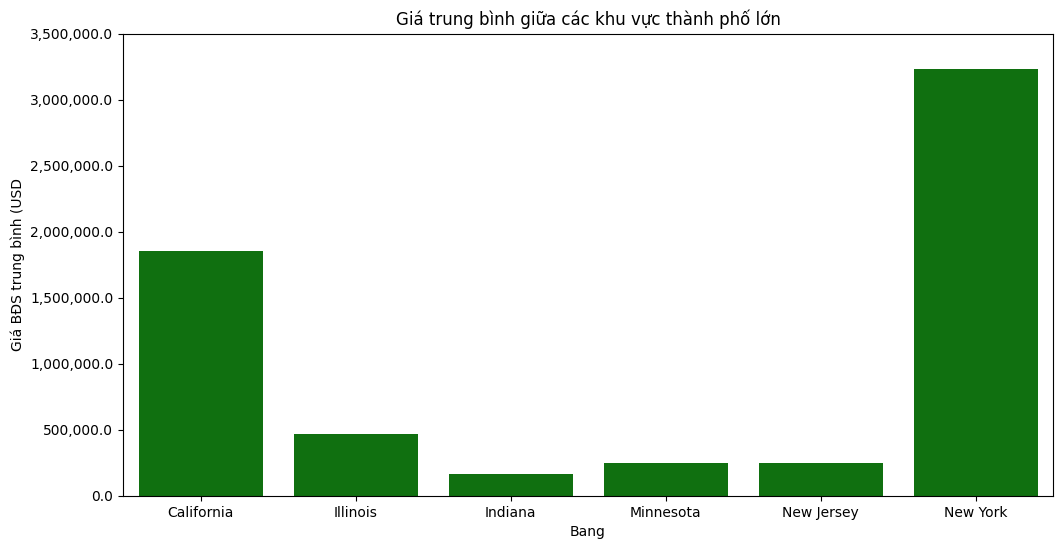

In [55]:
average_state = df_city.groupby('state')['price'].mean()

plt.figure(figsize =(12,6))
sns.barplot(x =average_state.index, y =average_state.values, color = 'green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các khu vực thành phố lớn')
plt.xlabel('Bang')
plt.ylabel('Giá BĐS trung bình (USD')

Text(0, 0.5, 'USD')

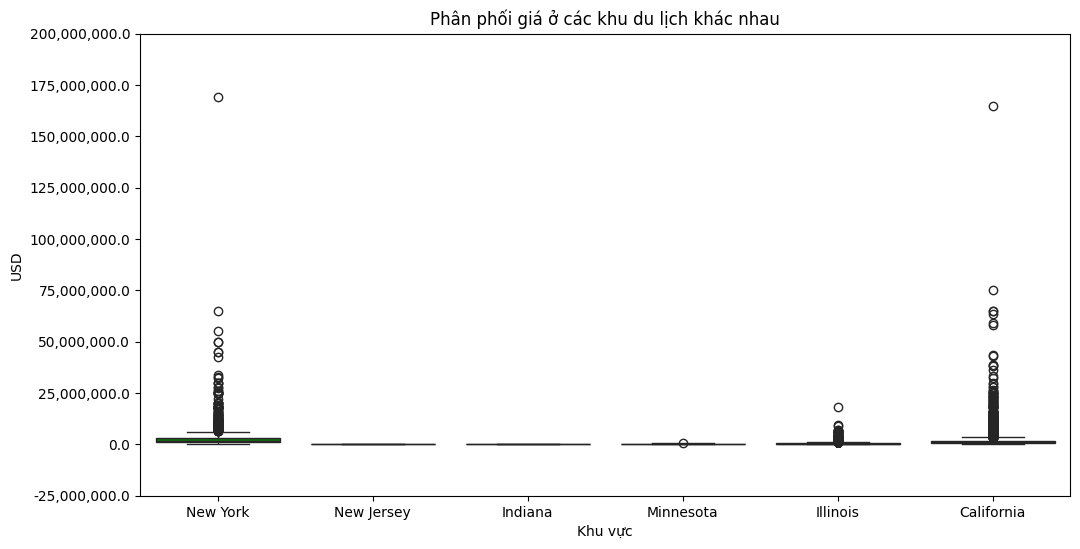

In [56]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'state', y = 'price', data = df_city, color = 'Green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])


plt.title('Phân phối giá ở các khu du lịch khác nhau')
plt.xlabel('Khu vực')
plt.ylabel('USD')

''

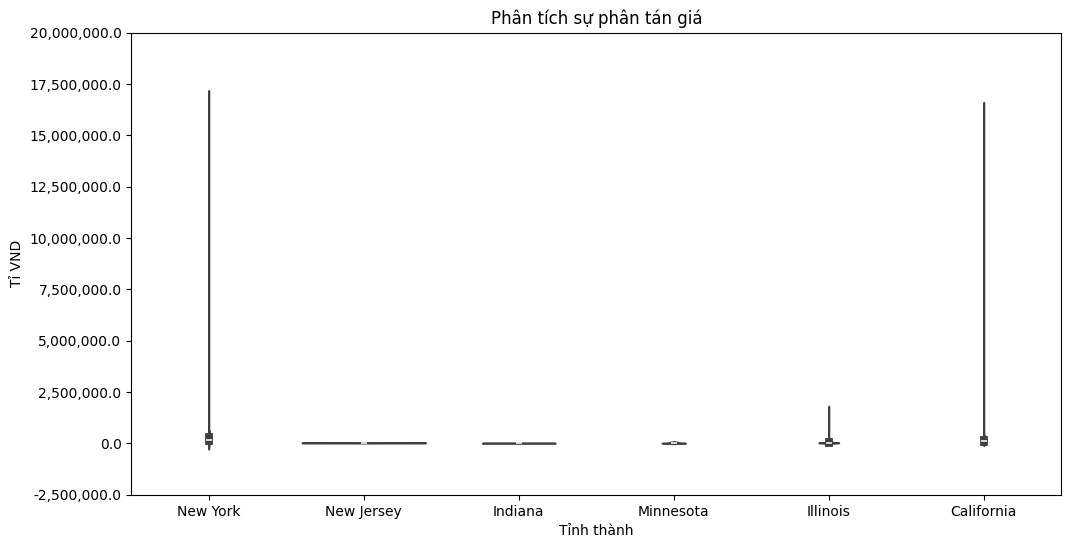

In [57]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='state', y='price', data=df_city)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in yticks])

plt.title('Phân tích sự phân tán giá')
plt.xlabel('Tỉnh thành')
plt.ylabel('Tỉ VND')
;

Text(0, 0.5, 'Giá USD')

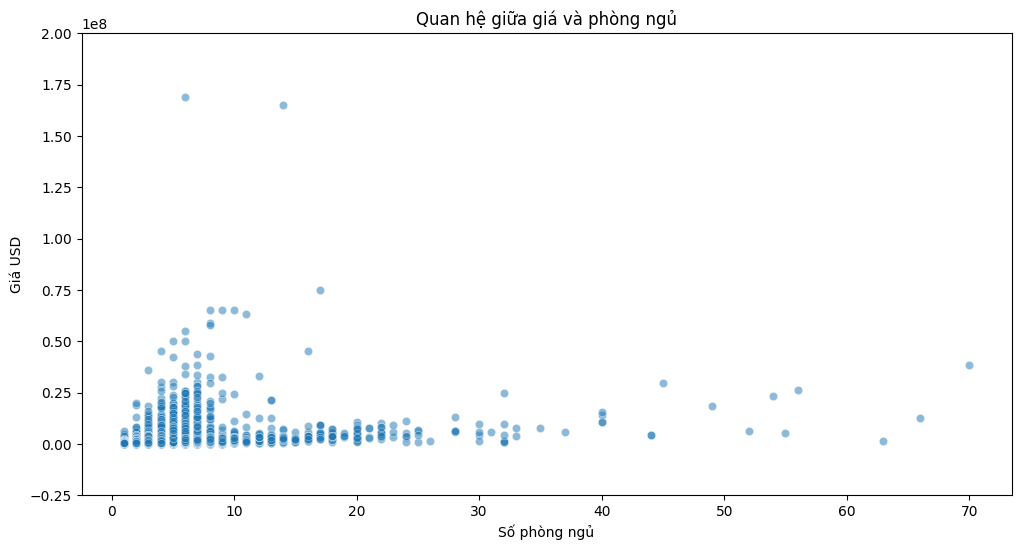

In [58]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='bed', y='price', data=df_city, alpha=0.5)

yticks = plt.yticks()[0]
plt.yticks(yticks,label = [f'{float(tick) / (10):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và phòng ngủ')

plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá USD')

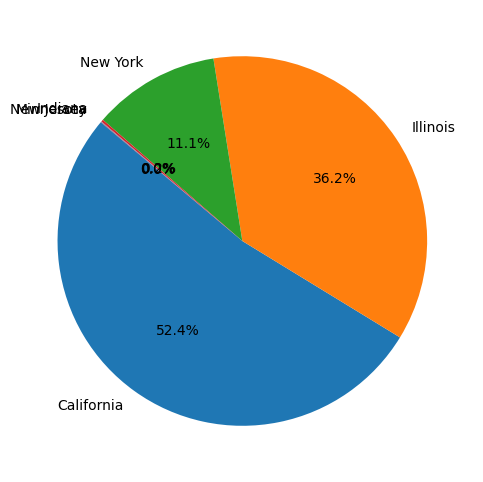

In [59]:
real_estate_counts = df_city['state'].value_counts()

plt.figure(figsize = (12,6))
plt.pie(real_estate_counts, labels = real_estate_counts.index, autopct ='%1.1f%%', startangle = 140);

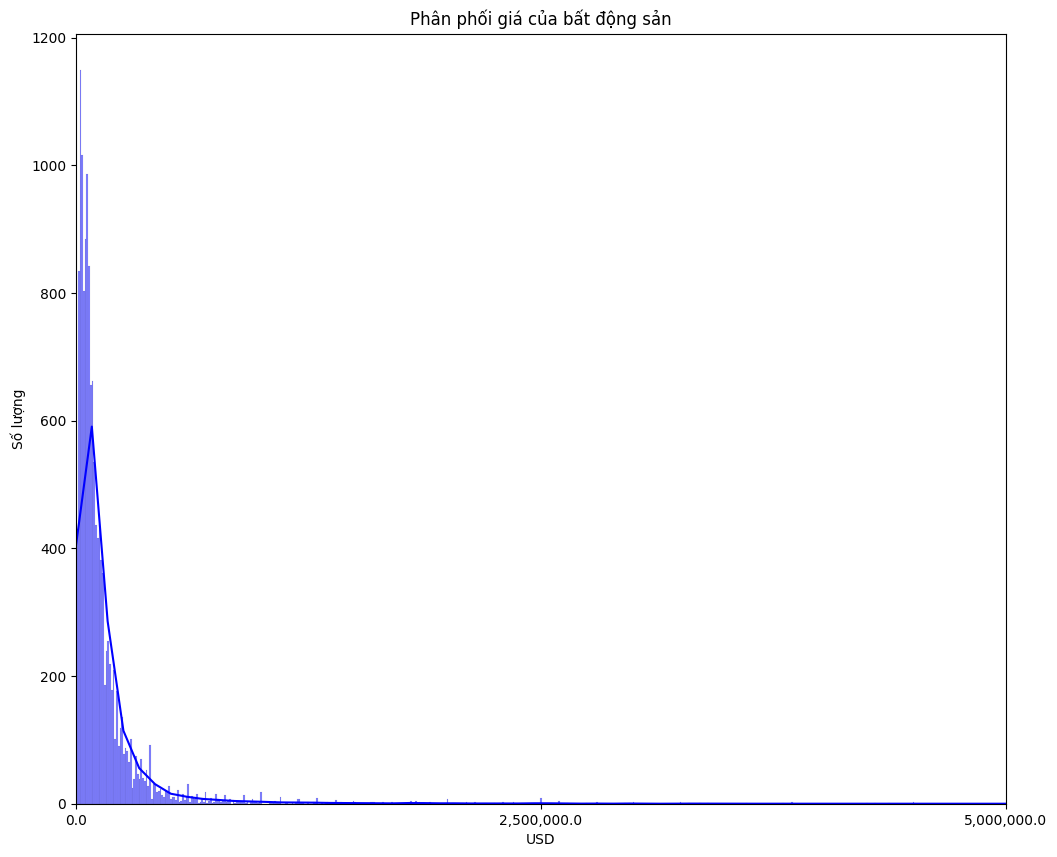

In [60]:
plt.figure(figsize=(12, 10))
sns.histplot(df_city['price'], kde=True, color='blue')

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in xticks])
plt.xlim(0)
plt.xlim(0,50000000)

plt.title('Phân phối giá của bất động sản')
plt.xlabel('USD')
plt.ylabel('Số lượng');

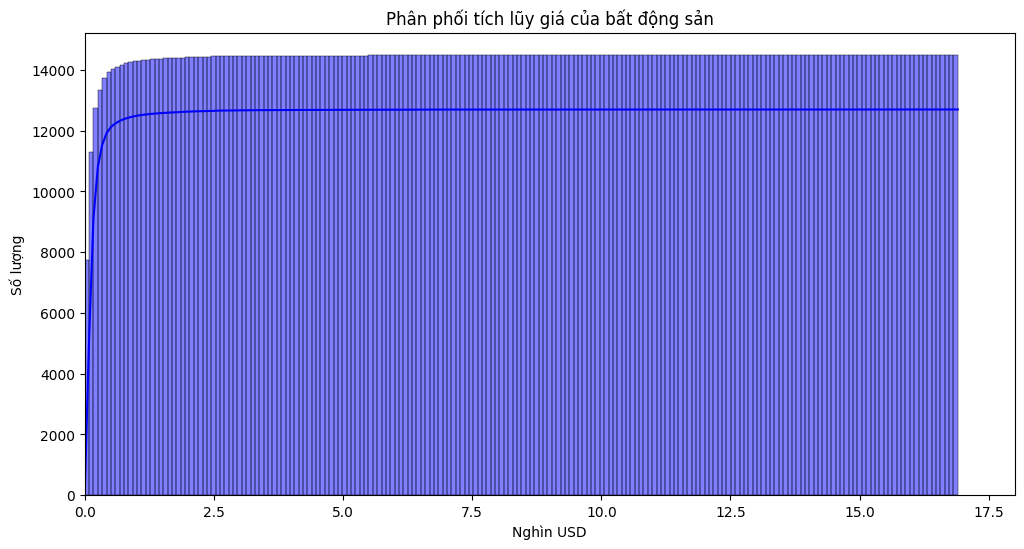

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(df_city['price'], kde=True, color='blue', cumulative=True, bins=200)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**6)):,.1f}' for tick in xticks])
plt.xlim(0,180000000)

plt.title('Phân phối tích lũy giá của bất động sản')
plt.xlabel('Nghìn USD')
plt.ylabel('Số lượng');

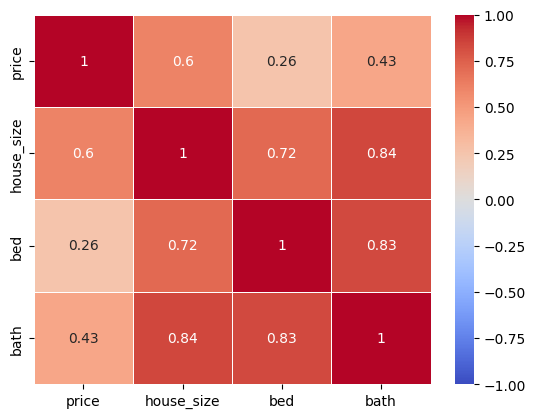

In [61]:
# Heatmap: Tương quan giữa giá và các yếu tố khác.
corr_matrix = df_city[['price', 'house_size','bed', 'bath']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5);

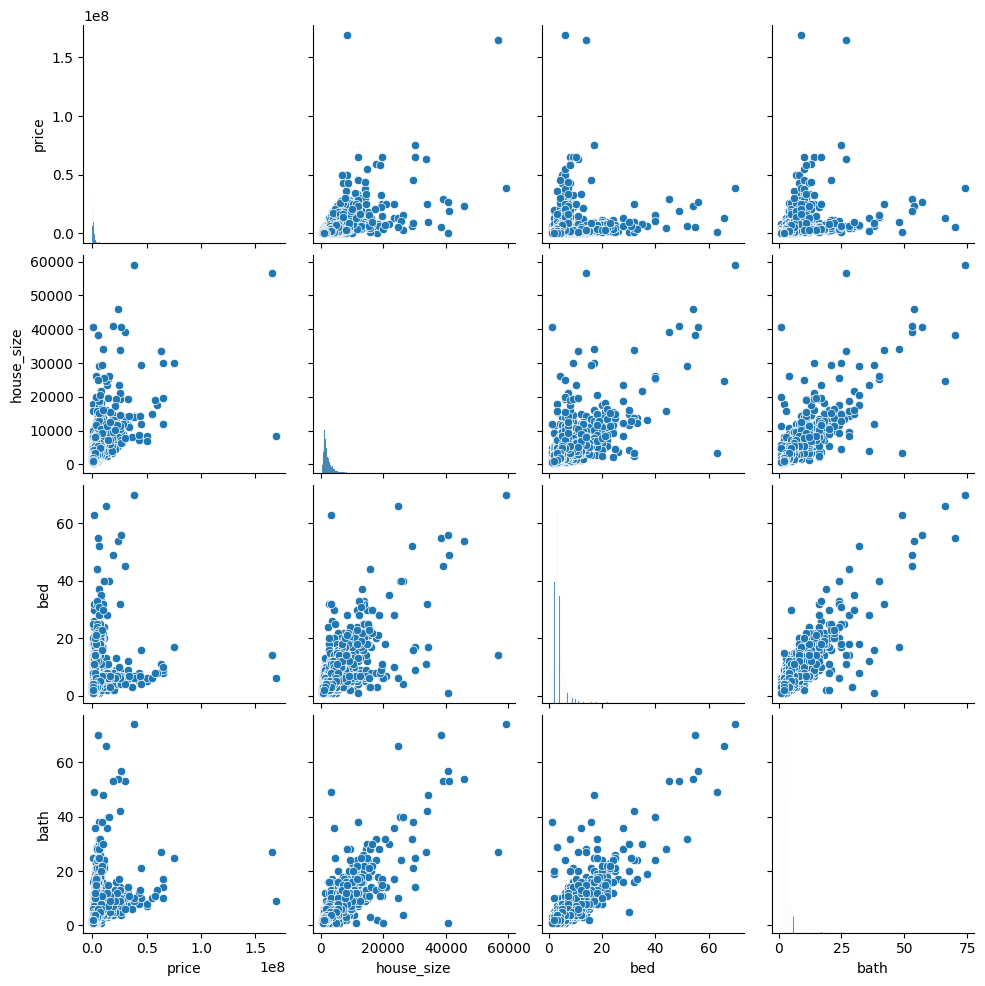

In [62]:
sns.pairplot(df_city[['price', 'house_size','bed', 'bath']]);

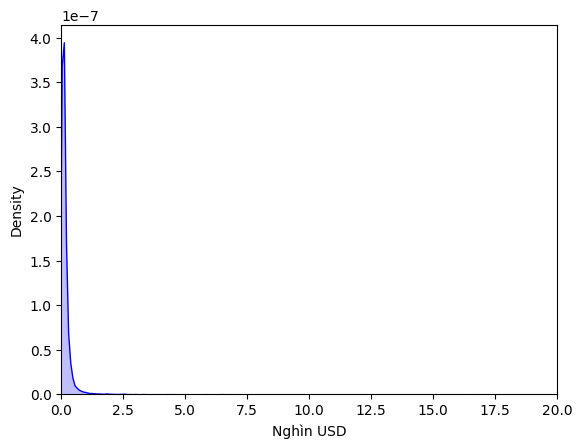

In [70]:
sns.kdeplot(df_city['price'], color='blue', fill=True)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**6)):,.1f}' for tick in xticks])
plt.xlim(0)

plt.xlabel('Nghìn USD');

''

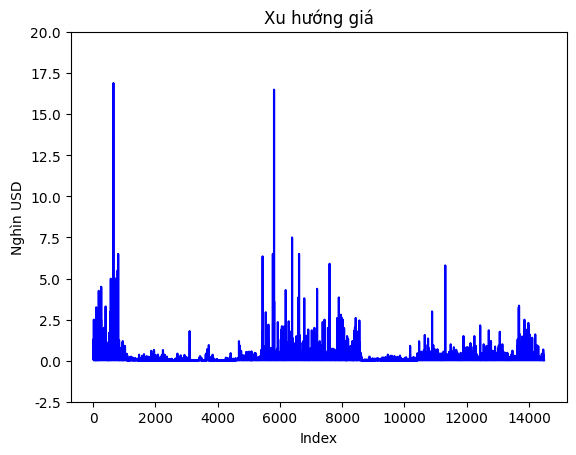

In [65]:
sns.lineplot(data=df_city['price'], color='blue')
plt.fill_between(df_city.index, df_city['price'], color='blue', alpha=0.3)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(10**6)):,.1f}' for tick in yticks])

plt.title('Xu hướng giá')
plt.xlabel('Index')
plt.ylabel('Nghìn USD')
;


''

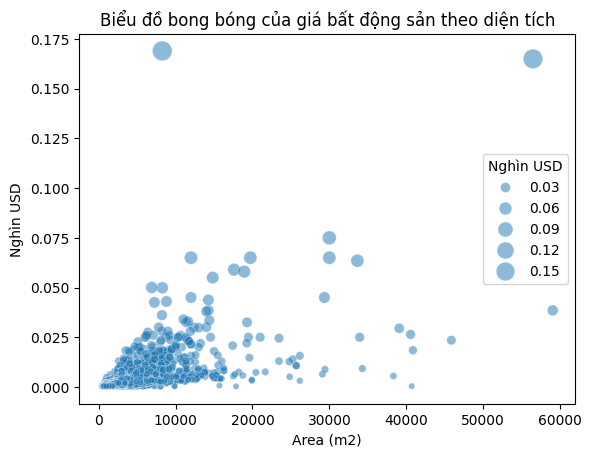

In [64]:
price_billion = df_city['price'].apply(lambda x: x/(10**9))

sns.scatterplot(x=df_city.house_size, y=price_billion, size=price_billion, sizes=(20, 200), alpha=0.5)

plt.title('Biểu đồ bong bóng của giá bất động sản theo diện tích')
plt.xlabel('Area (m2)')
plt.ylabel('Nghìn USD')

plt.legend(title='Nghìn USD', fontsize='10')

;

In [67]:
# Huấn luyện mô hình
X = df_city[['house_size', 'bed', 'bath']]
Y = df_city[['price']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
price_predictions = model.predict(X_test)

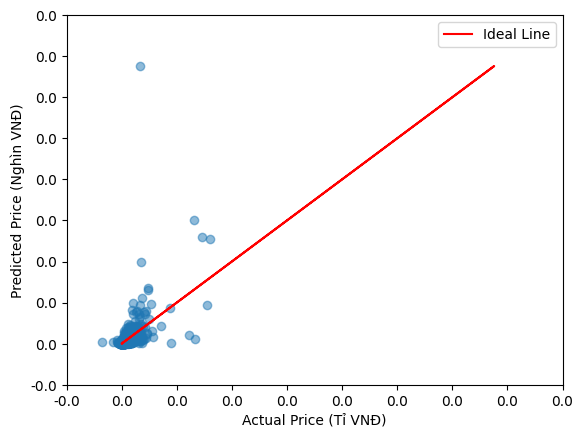

In [68]:
# Visualize khả năng dự đoán
plt.scatter(x=price_predictions, y=Y_test.values, alpha=0.5)
plt.plot(Y_test.values, Y_test.values, color='red', label='Ideal Line')

plt.ylabel('Predicted Price (Nghìn USD)')
plt.xlabel('Actual Price (Ngìn USD)')
plt.legend()

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**9)):,.1f}' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(10**9)):,.1f}' for tick in yticks]);